<H1>SuperAlligator JCO</H1>
6 EMA - 3 SuperTrend - Stock RSI - WillR
<H2>Init and load pairs</H2>

In [15]:
import sys
sys.path.append( '../utilities' )
from data_engine import DataEngine
from backtesting import Backtesting
import pandas as pd
import pandas_ta as pda # used for superTrend
import ta
import ccxt
import json
f = open('../database/pair_list.json',)
pairJson = json.load(f)
f.close()

<H2>Load candles</H2>

In [16]:
#pairList = pairJson['ftxBnbPair']
pairList = pairJson['ftxClassicPair']

timeframe = '1h'
startDate = '2017-01-01T00:00:00'

dataEngine = DataEngine(session=ccxt.ftx())

dfList = []
for pair in pairList:
    df = dataEngine.get_historical_from_db(pair, timeframe, startDate)
    dfList.append(df)

print("Data load 100%")
dfList[0]

Successfully load 22345 candles for BTCUSD
Successfully load 21019 candles for ETHUSD
Successfully load 19225 candles for BNBUSD
Successfully load 16768 candles for LTCUSD
Successfully load 9348 candles for DOGEUSD
Successfully load 13611 candles for XRPUSD
Successfully load 13432 candles for SOLUSD
Successfully load 6531 candles for SHIBUSD
Successfully load 15758 candles for LINKUSD
Successfully load 12181 candles for UNIUSD
Successfully load 10898 candles for MATICUSD
Successfully load 7350 candles for AXSUSD
Successfully load 7662 candles for CROUSD
Successfully load 22154 candles for FTTUSD
Successfully load 15605 candles for TRXUSD
Successfully load 16768 candles for BCHUSD
Successfully load 8364 candles for FTMUSD
Successfully load 9948 candles for GRTUSD
Successfully load 11582 candles for AAVEUSD
Successfully load 10898 candles for OMGUSD
Successfully load 7975 candles for LRCUSD
Successfully load 12571 candles for SUSHIUSD
Successfully load 3510 candles for MANAUSD
Successful

,open,high,low,close,volume
timestamp,,,,,
2019-07-21 13:00:00,10529.0,10593.5,10492.0,10535.5,1.052900e+00
2019-07-21 14:00:00,10534.5,10549.5,10345.0,10408.5,0.000000e+00
2019-07-21 15:00:00,10408.5,10483.5,10353.5,10457.0,0.000000e+00
2019-07-21 16:00:00,10454.5,10479.5,10370.0,10378.0,0.000000e+00
2019-07-21 17:00:00,10374.0,10472.5,10330.0,10429.0,8.451135e+01
...,...,...,...,...,...
2022-02-06 11:00:00,41595.0,41645.0,41468.0,41543.0,5.657704e+06
2022-02-06 12:00:00,41543.0,41678.0,41521.0,41638.0,9.717532e+06
2022-02-06 13:00:00,41638.0,41835.0,41510.0,41720.0,1.930421e+07


<H2>Calculate Indicators</H2>

In [36]:
# -- Indicator variable --
stochWindow = 14
willWindow = 14

for df in dfList:
    # -- Drop all columns we do not need --
    df.drop(columns=df.columns.difference(['open','high','low','close','volume','FG']), axis=1, inplace=True)

    # -- Indicators, you can edit every value --    
    df['EMA1']=ta.trend.ema_indicator(close=df['close'], window=3) # original 7, Fibo 5
    df['EMA2']=ta.trend.ema_indicator(close=df['close'], window=13) # original 30, Fibo 13
    df['EMA3']=ta.trend.ema_indicator(close=df['close'], window=34) # original 50, Fibo 34
    df['EMA4']=ta.trend.ema_indicator(close=df['close'], window=89) # original 100, Fibo 89
    df['EMA5']=ta.trend.ema_indicator(close=df['close'], window=233) # original 121, Fibo 233
    df['EMA6']=ta.trend.ema_indicator(close=df['close'], window=610) # original 200, Fibo 610

    df['SSA'] = ta.trend.ichimoku_a(df['high'],df['low'],3,38).shift(periods=48)
    df['SSB'] = ta.trend.ichimoku_b(df['high'],df['low'],38,46).shift(periods=48)
    df['KIJUN'] = ta.trend.ichimoku_base_line(df['high'],df['low'])
    df['TENKAN'] = ta.trend.ichimoku_conversion_line(df['high'],df['low'])

    #Super Trend
    ST_length = 10
    ST_multiplier = 3.0
    superTrend = pda.supertrend(high=df['high'], low=df['low'], close=df['close'], length=ST_length, multiplier=ST_multiplier)
    df['SUPER_TREND'] = superTrend['SUPERT_'+str(ST_length)+"_"+str(ST_multiplier)] #Valeur de la super trend
    df['SUPER_TREND_DIRECTION'] = superTrend['SUPERTd_'+str(ST_length)+"_"+str(ST_multiplier)] #Retourne 1 si vert et -1 si rouge

    #Super Trend 1
    ST_length = 10
    ST_multiplier = 1.0
    superTrend = pda.supertrend(high=df['high'], low=df['low'], close=df['close'], length=ST_length, multiplier=ST_multiplier)
    df['SUPER_TREND_1'] = superTrend['SUPERT_'+str(ST_length)+"_"+str(ST_multiplier)] #Valeur de la super trend
    df['SUPER_TREND_DIRECTION_1'] = superTrend['SUPERTd_'+str(ST_length)+"_"+str(ST_multiplier)] #Retourne 1 si vert et -1 si rouge

   #Super Trend 2
    ST_length = 11
    ST_multiplier = 2.0
    superTrend = pda.supertrend(high=df['high'], low=df['low'], close=df['close'], length=ST_length, multiplier=ST_multiplier)
    df['SUPER_TREND_2'] = superTrend['SUPERT_'+str(ST_length)+"_"+str(ST_multiplier)] #Valeur de la super trend
    df['SUPER_TREND_DIRECTION_2'] = superTrend['SUPERTd_'+str(ST_length)+"_"+str(ST_multiplier)] #Retourne 1 si vert et -1 si rouge

   #Super Trend 3
    ST_length = 12
    ST_multiplier = 3.5
    superTrend = pda.supertrend(high=df['high'], low=df['low'], close=df['close'], length=ST_length, multiplier=ST_multiplier)
    df['SUPER_TREND_3'] = superTrend['SUPERT_'+str(ST_length)+"_"+str(ST_multiplier)] #Valeur de la super trend
    df['SUPER_TREND_DIRECTION_3'] = superTrend['SUPERTd_'+str(ST_length)+"_"+str(ST_multiplier)] #Retourne 1 si vert et -1 si rouge

    # df['ADX']=ta.trend.adx(high=df['high'], low=df['low'], close=df['close'], window=14)

    df['STOCH_RSI'] = ta.momentum.stochrsi(close=df['close'], window=stochWindow, smooth1=3, smooth2=3)
    df['WillR'] = ta.momentum.williams_r(high=df['high'], low=df['low'], close=df['close'], lbp=willWindow)

print("Indicators loaded 100%")
dfList[0]

Indicators loaded 100%


,open,high,low,close,volume,EMA1,EMA2,EMA3,EMA4,EMA5,...,SUPER_TREND,SUPER_TREND_DIRECTION,SUPER_TREND_1,SUPER_TREND_DIRECTION_1,SUPER_TREND_2,SUPER_TREND_DIRECTION_2,SUPER_TREND_3,SUPER_TREND_DIRECTION_3,STOCH_RSI,WillR
timestamp,,,,,,,,,,,,,,,,,,,,,
2019-07-21 13:00:00,10529.0,10593.5,10492.0,10535.5,1.052900e+00,NaN,NaN,NaN,NaN,NaN,...,0.000000,1,0.000000,1,0.000000,1,0.000000,1,NaN,NaN
2019-07-21 14:00:00,10534.5,10549.5,10345.0,10408.5,0.000000e+00,NaN,NaN,NaN,NaN,NaN,...,NaN,1,NaN,1,NaN,1,NaN,1,NaN,NaN
2019-07-21 15:00:00,10408.5,10483.5,10353.5,10457.0,0.000000e+00,10464.500000,NaN,NaN,NaN,NaN,...,NaN,1,NaN,1,NaN,1,NaN,1,NaN,NaN
2019-07-21 16:00:00,10454.5,10479.5,10370.0,10378.0,0.000000e+00,10421.250000,NaN,NaN,NaN,NaN,...,NaN,1,NaN,1,NaN,1,NaN,1,NaN,NaN
2019-07-21 17:00:00,10374.0,10472.5,10330.0,10429.0,8.451135e+01,10425.125000,NaN,NaN,NaN,NaN,...,NaN,1,NaN,1,NaN,1,NaN,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-06 11:00:00,41595.0,41645.0,41468.0,41543.0,5.657704e+06,41582.807136,41578.719864,41230.466228,40020.272452,38891.611689,...,40971.743532,1,41427.581177,1,41183.759786,1,40803.669381,1,0.000000,-55.194805
2022-02-06 12:00:00,41543.0,41678.0,41521.0,41638.0,9.717532e+06,41610.403568,41587.188455,41253.753872,40056.221953,38915.085093,...,40971.743532,1,41427.581177,1,41183.759786,1,40807.614841,1,0.467015,-26.876513
2022-02-06 13:00:00,41638.0,41835.0,41510.0,41720.0,1.930421e+07,41665.201784,41606.161533,41280.396508,40093.194799,38939.058725,...,41002.932581,1,41449.310860,1,41214.888352,1,40851.813605,1,0.852242,-23.046092


<H2>Backtest</H2>

In [37]:
dfTestList = []
for df in dfList:
    dfTestList.append(df.loc['2021-01-01':])

# -- Starting value --
startingBalance = 100
makerFee = 0.00019
takerFee = 0.000665

# -- Rules --
StopLossActivation = False
takeProfitActivation = False
showLog = False
extremeFear = True

# -- Hyper parameters --
stochOverBought = 0.90 # 0.8 default
stochOverSold = 0.10 # 0.2 default
SlPct = 0.04 # 0.015 default
TpPct = 0.10 # 0.15 default
willOverSold = -95 # -80 to -100 means OverSold
willOverBought = -5 # 0 to -20 means OverBought
maxPositions = 3 # best results with 3 open positions max

# -- Trade Functions --

# -- Condition to BUY market --
def buyCondition(row, previousRow=None):
    if (
        extremeFear
        and row['EMA1'] > row['EMA2']
        and row['EMA2'] > row['EMA3']
        and row['EMA3'] > row['EMA4']
        and row['EMA4'] > row['EMA5']
        and row['EMA5'] > row['EMA6']
        # row['SUPER_TREND_DIRECTION'] == 1 # greed
        and row['SUPER_TREND_DIRECTION_1'] == 1 # extreme fear
        and row['SUPER_TREND_DIRECTION_2'] == 1 # extreme fear
        and row['SUPER_TREND_DIRECTION_3'] == 1 # extreme fear
        # and (row['close'] > row['SSA'] or row['close'] < row['SSB'])
        # and row['SSA'] > row['SSB']
        and row['close'] > row['KIJUN']
        # and row['close'] > row['TENKAN']
        # and row['ADX'] > 25
        and (row['STOCH_RSI'] < stochOverBought and row['WillR'] < willOverBought) # extreme fear
        ):
            return True
    elif (
        not extremeFear
        and row['EMA1'] > row['EMA2']
        and row['EMA2'] > row['EMA3']
        and row['EMA3'] > row['EMA4']
        and row['EMA4'] > row['EMA5']
        and row['EMA5'] > row['EMA6']
        and row['SUPER_TREND_DIRECTION'] == 1 # greed
        # and row['SUPER_TREND_DIRECTION_1'] == 1 # extreme fear
        # and row['SUPER_TREND_DIRECTION_2'] == 1 # extreme fear
        # and row['SUPER_TREND_DIRECTION_3'] == 1 # extreme fear
        # and (row['close'] > row['SSA'] or row['close'] < row['SSB'])
        # and row['SSA'] > row['SSB']
        and row['close'] > row['KIJUN']
        # and row['close'] > row['TENKAN']
        # and row['ADX'] > 25
        # and (row['STOCH_RSI'] < stochOverBought and row['WillR'] < willOverBought) # extreme fear
        ):
            return True
    else:
        return False

# -- Condition to SELL market --
def sellCondition(row, previousRow=None):
    # if row['EMA2'] > row['EMA1'] and (row['STOCH_RSI']>0.2 or row['WillR'] > willOverBought): # Original bglacial
    # if row['EMA6'] > row['EMA1'] and (row['STOCH_RSI']>0.2 or row['WillR'] > willOverBought): # Cf. post Pahmoy
    if (
        row['EMA1'] < row['EMA2']
        and (row['STOCH_RSI'] > stochOverSold and row['WillR'] > willOverSold)
    ): # JCO
        return True
    else:
        return False

# -- Value initialisation --
usd = startingBalance
wallet = startingBalance
stopLoss = [0] * len(pairList)
takeProfit = [5000000] * len(pairList)
walletCoinArray = [0] * len(pairList)
walletUsdArray = [0] * len(pairList)
activePositions = 0
lastIndex = dfTestList[0].index.values[1]

# -- Definition of dfTrades, that will be the dataset to do your trades analyses --
dfTrades = None
dfTrades = pd.DataFrame(columns=['date', 'symbol','position', 'reason',
                                 'price', 'frais', 'fiat', 'coins', 'wallet'])

# # -- Iteration on all your price dataset (df) --
for index, row in dfTestList[0].iterrows():
    # -- Check if you have one coin in your wallet --
    if (walletCoinArray.count(0) == len(walletCoinArray)) == False:
        # -- Iteration on all coin (upgrade possible: only check coin in your wallet) --
        for i in range(0,len(dfTestList)):
            # -- Check if you have more than 0 coin --
            if walletCoinArray[i] != 0:
                try:
                    actualRow = dfTestList[i].loc[index]
                    previousRow = dfTestList[i].loc[lastIndex]
                    # -- Stop Loss --
                    if actualRow['low'] < stopLoss[i] :
                        sellPrice = stopLoss[i]
                        usd = usd + walletCoinArray[i] * sellPrice
                        fee = makerFee * walletCoinArray[i] * sellPrice
                        usd = usd - fee
                        # -- Set coin and equivalent usd to 0 after sold position --
                        walletCoinArray[i] = 0
                        walletUsdArray[i] = 0
                        activePositions -= 1

                        # -- LOG --
                        if showLog:
                            print("Sell COIN at Stop Loss", sellPrice, '$ the', index)

                        # -- Add the trade to dfTrades to analyse it later --
                        myrow = {
                            'date': index,
                            'symbol': pairList[i],
                            'position': "Sell",
                            'reason': 'Sell Stop Loss',
                            'price': sellPrice,
                            'frais': fee,
                            'fiat': usd,
                            'coins': 0,
                            'wallet': sum(walletUsdArray) + usd
                        }
                        dfTrades = dfTrades.append(myrow, ignore_index=True)

                    # -- Take Profit --
                    elif actualRow['high'] > takeProfit[i] :
                        sellPrice = takeProfit[i]
                        usd = usd + walletCoinArray[i] * sellPrice
                        fee = makerFee * walletCoinArray[i] * sellPrice
                        usd = usd - fee
                        # -- Set coin and equivalent usd to 0 after sold position --
                        walletCoinArray[i] = 0
                        walletUsdArray[i] = 0
                        activePositions -= 1

                        # -- LOG --
                        if showLog:
                            print("Sell COIN at Take Profit", sellPrice, '$ the', index)

                        # -- Add the trade to dfTrades to analyse it later --
                        myrow = {
                            'date': index,
                            'symbol': pairList[i],
                            'position': "Sell",
                            'reason': 'Sell Take Profit',
                            'price': sellPrice,
                            'frais': fee,
                            'fiat': usd,
                            'coins': 0,
                            'wallet': sum(walletUsdArray) + usd
                        }
                        dfTrades = dfTrades.append(myrow, ignore_index=True)

                    # -- Sell Market --
                    elif sellCondition(actualRow,previousRow):
                        sellPrice = actualRow['close']
                        usd = usd + walletCoinArray[i] * sellPrice
                        fee = takerFee * walletCoinArray[i] * sellPrice
                        usd = usd - fee
                        # -- Set coin and equivalent usd to 0 after sold position --
                        walletCoinArray[i] = 0
                        walletUsdArray[i] = 0
                        activePositions -= 1

                        # -- LOG --
                        if showLog:
                            print("Sell", pairList[i],"at", sellPrice, '$ the', index)

                        # -- Add the trade to DfTrades to analyse it later --
                        myrow = {
                            'date': index,
                            'symbol': pairList[i],
                            'position': "Sell",
                            'reason': 'Sell Market Order',
                            'price': sellPrice,
                            'frais': fee,
                            'fiat': usd,
                            'coins': 0,
                            'wallet': sum(walletUsdArray) + usd
                        }
                        dfTrades = dfTrades.append(myrow, ignore_index=True)
                except:
                    pass
    # -- Buy market order --
    # -- Check if you can open a new position --
    if activePositions < maxPositions:
        # -- Check buy condition for each coin of list --
        for i in range(0,len(dfTestList)):
            try:
                actualRow = dfTestList[i].loc[index]
                previousRow = dfTestList[i].loc[lastIndex]
                # -- Buy condition --
                if buyCondition(actualRow, previousRow) and activePositions < maxPositions and walletCoinArray[i]==0 :
                    buyPrice = actualRow['close']
                    # -- Define size of the position --
                    usdMultiplier = 1/(maxPositions-activePositions)
                    fee = takerFee * usd * usdMultiplier
                    usd = usd - fee
                    coin = (usd * usdMultiplier) / buyPrice
                    usd = usd - (usd * usdMultiplier)
                    # -- Set coin and equivalent usd to size of position after open position --
                    walletCoinArray[i] = coin
                    walletUsdArray[i] = coin * actualRow['close']
                    activePositions += 1
                    # -- Create a Stop Loss --
                    if StopLossActivation:
                        stopLoss[i] = buyPrice - SlPct * buyPrice
                    # -- Create a Take Profit --
                    if takeProfitActivation:
                        takeProfit[i] = buyPrice + TpPct * buyPrice

                    # -- LOG --
                    if showLog:
                        print("Buy", pairList[i],"at", buyPrice, '$ the', index)

                    # -- Add the trade to dfTrades to analyse it later --
                    myrow = {
                        'date': index,
                        'symbol': pairList[i],
                        'position': "Buy",
                        'reason': 'Buy Market Order',
                        'price': buyPrice,
                        'frais': fee,
                        'fiat': usd,
                        'coins': coin,
                        'wallet': sum(walletUsdArray) + usd
                    }
                    dfTrades = dfTrades.append(myrow, ignore_index=True)
            except:
                pass

    # -- Keep last index to define last row --            
    lastIndex = index

print("Final wallet", round((sum(walletUsdArray) + usd), 2), "$")

Final wallet 147048.53 $


<H2>Results</H2>

In [38]:
BTobject = Backtesting()
newDf = BTobject.multi_spot_backtest_analys(dfTrades=dfTrades, dfTest=dfTestList[0], pairList=pairList, timeframe=timeframe)

Trading Bot on : 29 coins | Timeframe : 1h
Period : [2021-01-01 00:00:00] -> [2022-02-06 15:00:00]
Starting balance : 99.98 $

----- General Informations -----
Final balance : 147048.53 $
Performance vs US Dollar : 146981.13 %
Bitcoin Buy and Hold Performence : 42.33 %
Performance vs Buy and Hold : 103240.18 %
Best trade : +51.24 %, the 2021-10-07 19:00:00
Worst trade : -6.41 %, the 2021-03-25 02:00:00
Worst drawDown : - 22.28 %
Total fees :  9576.99 $

----- Trades Informations -----
Total trades on period : 814
Number of positive trades : 346
Number of negative trades :  468
Trades win rate ratio : 42.51 %
Average trades performance : 1.01 %
Average positive trades : 3.75 %
Average negative trades : -1.01 %

----- Trades Reasons -----
Buy Market Order     815
Sell Market Order    814
Name: reason, dtype: int64

----- Pair Result -----
-----------------------------------------------------------------------------------------------
Trades      Pair     Sum-result     Mean-trade    Worst

In [39]:
newDf.iloc[-5:]

,date,symbol,position,reason,price,frais,fiat,coins,wallet,resultat,resultat%,tradeIs,walletAth,drawDown,drawDownPct
date,,,,,,,,,,,,,,,
2022-02-04 10:00:00,2022-02-04 10:00:00,FTT/USD,Buy,Buy Market Order,43.7230,32.090811,96492.324415,1103.450408,144738.486623,NaN,NaN,,156513.23696,11774.750337,0.075232
2022-02-05 20:00:00,2022-02-05 20:00:00,FTT/USD,Sell,Sell Market Order,46.0740,33.808849,147298.889684,0.000000,147298.889684,2560.403061,1.768986,Good,156513.23696,9214.347276,0.058873
2022-02-05 21:00:00,2022-02-05 21:00:00,FTT/USD,Buy,Buy Market Order,46.3340,32.651254,98177.492287,1059.454097,147266.238430,NaN,NaN,,156513.23696,9246.998530,0.059081
2022-02-06 07:00:00,2022-02-06 07:00:00,FTT/USD,Sell,Sell Market Order,46.1900,32.542563,147081.134477,0.000000,147081.134477,-185.103953,-0.125693,Bad,156513.23696,9432.102483,0.060264
2022-02-06 10:00:00,2022-02-06 10:00:00,MANA/USD,Buy,Buy Market Order,3.1079,32.602985,98032.354328,15771.478221,147048.531492,NaN,NaN,,156513.23696,9464.705468,0.060472


----- 2021 Performances: 144033.99% -----


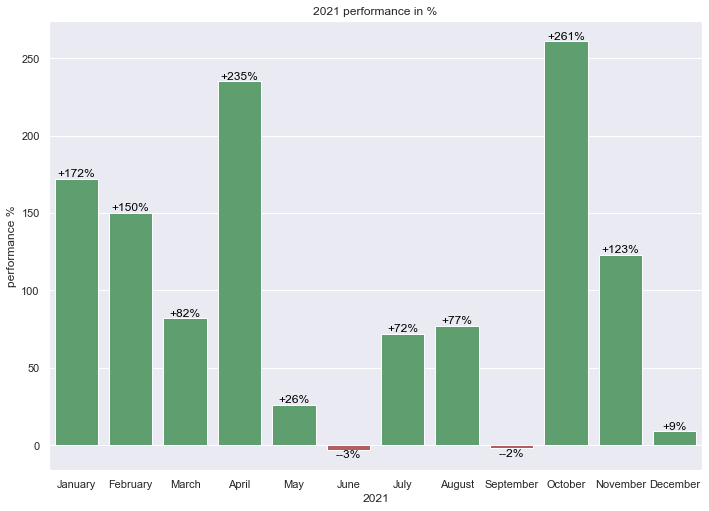

----- 2022 Performances: 2.07% -----


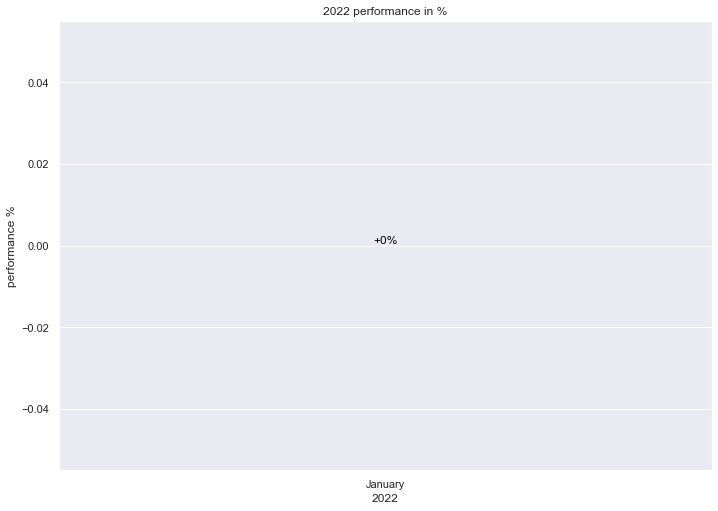

In [40]:
BTobject.plot_bar_by_month(dfTrades=dfTrades)


----- Plot -----


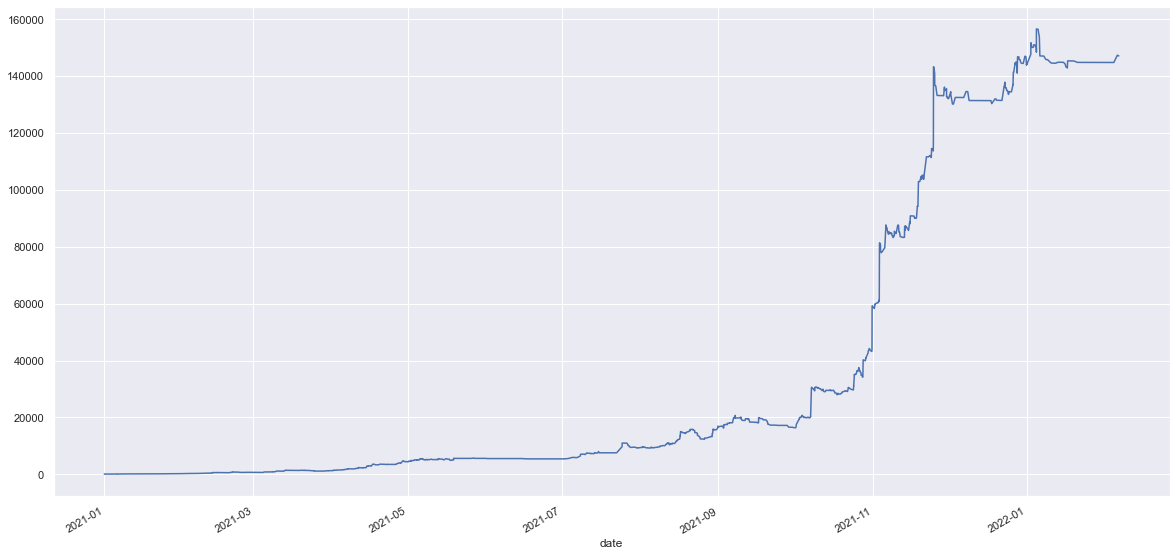

In [41]:
BTobject.plot_wallet_evolution(dfTrades=newDf['2021':])

In [42]:
dfTrades.iloc[-10:]

,date,symbol,position,reason,price,frais,fiat,coins,wallet
1619,2022-01-16 16:00:00,FTT/USD,Buy,Buy Market Order,46.46500,31.650837,47579.418181,1023.984035,143197.989220
1620,2022-01-17 01:00:00,FTT/USD,Sell,Sell Market Order,46.10500,31.395171,94758.806938,0.000000,142797.959796
1621,2022-01-17 04:00:00,FTM/USD,Sell,Sell Market Order,3.14915,33.635755,145305.253840,0.000000,145305.253840
1622,2022-01-19 15:00:00,FTT/USD,Buy,Buy Market Order,46.10100,32.209331,96848.696339,1050.396915,145273.044509
1623,2022-01-21 00:00:00,FTT/USD,Sell,Sell Market Order,45.65300,31.889257,144770.577434,0.000000,144770.577434
1624,2022-02-04 10:00:00,FTT/USD,Buy,Buy Market Order,43.72300,32.090811,96492.324415,1103.450408,144738.486623
1625,2022-02-05 20:00:00,FTT/USD,Sell,Sell Market Order,46.07400,33.808849,147298.889684,0.000000,147298.889684
1626,2022-02-05 21:00:00,FTT/USD,Buy,Buy Market Order,46.33400,32.651254,98177.492287,1059.454097,147266.238430
1627,2022-02-06 07:00:00,FTT/USD,Sell,Sell Market Order,46.19000,32.542563,147081.134477,0.000000,147081.134477
1628,2022-02-06 10:00:00,MANA/USD,Buy,Buy Market Order,3.10790,32.602985,98032.354328,15771.478221,147048.531492
